In [ ]:
!pip install biopython
import Bio
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqUtils import MeltingTemp as mt
from matplotlib import pyplot as plt
from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Read Files

In [ ]:
#FASTA/GB
# record = SeqIO.parse('nama file', 'tipe file')
# record = SeqIO.parse('dimas.gb','gb')
record = SeqIO.parse('sequence.fasta','fasta')

for record in SeqIO.parse('sequence.fasta','fasta'):
  print(record.id)
  print(record.name)
  print(record.description)
  print(len(record.features))
  print(record.seq)

MN908947.3
MN908947.3
MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
0
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAG

Potongan

In [ ]:
SeqX = record.seq

seqA = SeqX[2:8]
print(seqA)
seqB = SeqX[round(len(SeqX)/2):round(len(SeqX)/4)*3]
print(seqB)

TAAAGG
CCATTTAATAAATGGGGTAAGGCTAGACTTTATTATGATTCAATGAGTTATGAGGATCAAGATGCACTTTTCGCATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGTACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAGGAGCTACTGTAGTAATTGGAACAAGCAAATTCTATGGTGGTTGGCACAACATGTTAAAAACTGTTTATAGTGATGTAGAAAACCCTCACCTTATGGGTTGGGATTATCCTAAATGTGATAGAGCCATGCCTAACATGCTTAGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACGTGTTGTAGCTTGTCACACCGTTTCTATAGATTAGCTAATGAGTGTGCTCAAGTATTGAGTGAAATGGTCATGTGTGGCGGTTCACTATATGTTAAACCAGGTGGAACCTCATCAGGAGATGCCACAACTGCTTATGCTAATAGTGTTTTTAACATTTGTCAAGCTGTCACGGCCAATGTTAATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGTATGTCCGCAATTTACAACACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAGTTTTACGCATATTTGCGTAAACATTTCTCAATGATGATACTCTCTGACGATGCTGTTGTGTGTTTCAATAGCACTTATGCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAGTCAGTTCTTTATTATCAAAACAATGTTTTTATGTCTGAAGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCATGAATTTTGCTCTCAACATACAATGCTAGTTAAACAGGGTGATGATTATGTGTACCTTCCTTACCCAGATCCATCA

GC/AT Content

In [ ]:
from Bio.SeqUtils import GC
GCcount = GC(seqB)
ATcount = 100 - GCcount
print(GCcount)
print(ATcount)

36.83788121990369
63.16211878009631


/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


Melting Temp

In [ ]:
# Melting temp
mtseqB = mt.Tm_NN(seqB)
print(mtseqB)
mtseqA = mt.Tm_NN(seqA)
print(mtseqA)

77.0896743389074
-25.481509301025824


Mollecular Weight

In [ ]:
from Bio.SeqUtils import molecular_weight as mw
mwB = mw(seqB)
print(mwB)
mwA = mw(seqA)
print(mwA)

2311218.0731999776
1920.2398


Alignment

In [ ]:
from itertools import pairwise
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

alignmentlocal = pairwise2.align.localxx(seqB,seqA)
for b in alignmentlocal:
  print(format_alignment(*b))

/usr/local/lib/python3.10/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


7465 TACAGATGCTG
     || | | |  |
   1 TA-A-A-G--G
  Score=6

7464 TTACAGATGCTG
     | | | | |  |
   1 T-A-A-A-G--G
  Score=6

7456 TGGAACCATTACAGATGCTG
     |         | | | |  |
   1 T---------A-A-A-G--G
  Score=6

7450 TGAAAATGGAACCATTACAGATGCTG
     |               | | | |  |
   1 T---------------A-A-A-G--G
  Score=6

7447 TAATGAAAATGGAACCATTACAGATGCTG
     |                  | | | |  |
   1 T------------------A-A-A-G--G
  Score=6

7445 TATAATGAAAATGGAACCATTACAGATGCTG
     |                    | | | |  |
   1 T--------------------A-A-A-G--G
  Score=6

7440 TAAAATATAATGAAAATGGAACCATTACAGATGCTG
     |                         | | | |  |
   1 T-------------------------A-A-A-G--G
  Score=6

7439 TTAAAATATAATGAAAATGGAACCATTACAGATGCTG
     |                          | | | |  |
   1 T--------------------------A-A-A-G--G
  Score=6

7437 TATTAAAATATAATGAAAATGGAACCATTACAGATGCTG
     |                            | | | |  |
   1 T----------------------------A-A-A-G--G
  Score=6

7435 TCTATTAAAAT

In [ ]:
localscore = pairwise2.align.localxx(seqB, seqA,score_only = True)
print(localscore/len(seqB)*100)

0.08025682182985554


In [ ]:
DNA = seqB
DNA_Comp = DNA.complement()
# print(DNA_Comp)
# DNA_Reverse_Comp = DNA.reverse_complement
mRNA = DNA_Comp.transcribe()
protein = mRNA.translate()
print(DNA_Comp)
print(mRNA)
print(protein)

GGTAAATTATTTACCCCATTCCGATCTGAAATAATACTAAGTTACTCAATACTCCTAGTTCTACGTGAAAAGCGTATATGTTTTGCATTACAGTAGGGATGATATTGAGTTTACTTAGAATTCATACGGTAATCACGTTTCTTATCTCGAGCGTGGCATCGACCACAGAGATAGACATCATGATACTGGTTATCTGTCAAAGTAGTTTTTAATAACTTTAGTTATCGGCGGTGATCTCCTCGATGACATCATTAACCTTGTTCGTTTAAGATACCACCAACCGTGTTGTACAATTTTTGACAAATATCACTACATCTTTTGGGAGTGGAATACCCAACCCTAATAGGATTTACACTATCTCGGTACGGATTGTACGAATCTTAATACCGGAGTGAACAAGAACGAGCGTTTGTATGTTGCACAACATCGAACAGTGTGGCAAAGATATCTAATCGATTACTCACACGAGTTCATAACTCACTTTACCAGTACACACCGCCAAGTGATATACAATTTGGTCCACCTTGGAGTAGTCCTCTACGGTGTTGACGAATACGATTATCACAAAAATTGTAAACAGTTCGACAGTGCCGGTTACAATTACGTGAAAATAGATGACTACCATTGTTTTAACGGCTATTCATACAGGCGTTAAATGTTGTGTCTGAAATACTCACAGAGATATCTTTATCTCTACAACTGTGTCTGAAACACTTACTCAAAATGCGTATAAACGCATTTGTAAAGAGTTACTACTATGAGAGACTGCTACGACAACACACAAAGTTATCGTGAATACGTAGAGTTCCAGATCACCGATCGTATTTCTTGAAATTCAGTCAAGAAATAATAGTTTTGTTACAAAAATACAGACTTCGTTTTACAACCTGACTCTGACTGGAATGATTTCCTGGAGTACTTAAAACGAGAGTTGTATGTTACGATCAATTTGTCCCACTACTAATACACATGGAAGGAATGGGTCTAGGTAGTTCTTAGG

In [ ]:
#Match: 2 point
#Mismatch: -1 point
#Open Gap: -0.5
#Extend gap; -0.1

#Global alignment with maximum similarity score
seqa = Seq('ACTGACT')
seqb = Seq('TACG')
globalalignment = pairwise2.align.globalms(seqA, seqB, 2, -1, -0.5, -0.1)
for c in globalalignment:
  print(format_alignment(*c))

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------TAAAGG-----------------------------------------------------------------------------------------

In [ ]:
def check(x,y):
  return 0 if x==y else 1

def create_matrix(seqX, seqY):
  matrix = []
  for x in seqX:
    row =[]
    for y in seqY:
      row.append(check(x,y))
    matrix.append(row)
  return matrix

def display(matrix, seqX, seqY):
  print('  |' + seqY)
  print('='*(len(seqY)+3))
  for label, row in zip(seqX, matrix):
    line = ''.join('X' if s<1 else ' ' for s in row)
    print(label + ' |' + line)


matrix = create_matrix(seqA, seqB)
display(matrix, seqA, seqB)

  |CCATTTAATAAATGGGGTAAGGCTAGACTTTATTATGATTCAATGAGTTATGAGGATCAAGATGCACTTTTCGCATATACAAAACGTAATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAGTGCAAAGAATAGAGCTCGCACCGTAGCTGGTGTCTCTATCTGTAGTACTATGACCAATAGACAGTTTCATCAAAAATTATTGAAATCAATAGCCGCCACTAGAGGAGCTACTGTAGTAATTGGAACAAGCAAATTCTATGGTGGTTGGCACAACATGTTAAAAACTGTTTATAGTGATGTAGAAAACCCTCACCTTATGGGTTGGGATTATCCTAAATGTGATAGAGCCATGCCTAACATGCTTAGAATTATGGCCTCACTTGTTCTTGCTCGCAAACATACAACGTGTTGTAGCTTGTCACACCGTTTCTATAGATTAGCTAATGAGTGTGCTCAAGTATTGAGTGAAATGGTCATGTGTGGCGGTTCACTATATGTTAAACCAGGTGGAACCTCATCAGGAGATGCCACAACTGCTTATGCTAATAGTGTTTTTAACATTTGTCAAGCTGTCACGGCCAATGTTAATGCACTTTTATCTACTGATGGTAACAAAATTGCCGATAAGTATGTCCGCAATTTACAACACAGACTTTATGAGTGTCTCTATAGAAATAGAGATGTTGACACAGACTTTGTGAATGAGTTTTACGCATATTTGCGTAAACATTTCTCAATGATGATACTCTCTGACGATGCTGTTGTGTGTTTCAATAGCACTTATGCATCTCAAGGTCTAGTGGCTAGCATAAAGAACTTTAAGTCAGTTCTTTATTATCAAAACAATGTTTTTATGTCTGAAGCAAAATGTTGGACTGAGACTGACCTTACTAAAGGACCTCATGAATTTTGCTCTCAACATACAATGCTAGTTAAACAGGGTGATGATTATGTGTACCTTCCTTACCCAGATCCATCAAGAA

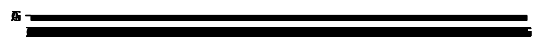

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.array(matrix))
xt = plt.xticks(np.arange(len(list(seqB))), list(seqB))
yt = plt.yticks(np.arange(len(list(seqA))), list(seqA))

In [ ]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.6 MB/s eta 0:00:00
